<a href="https://colab.research.google.com/github/harryyang1982/doit_python/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
mpg = pd.read_csv('https://github.com/tidyverse/ggplot2/raw/main/data-raw/mpg.csv').rename(columns={'class':'category'})


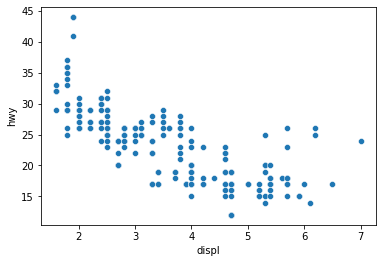

In [2]:
import seaborn as sns
sns.scatterplot(x = 'displ', y = 'hwy', data = mpg)

[(3.0, 6.0)]

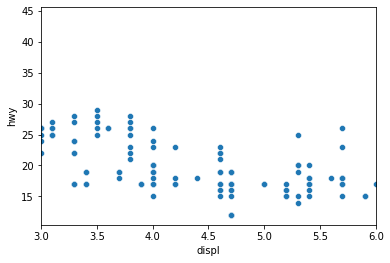

In [3]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6))

[(10.0, 30.0), (3.0, 6.0)]

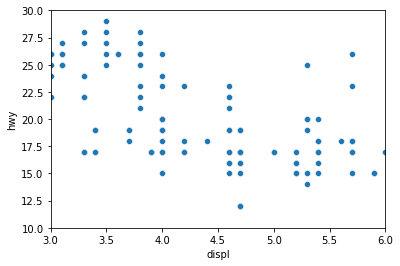

In [4]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6), ylim = (10, 30))

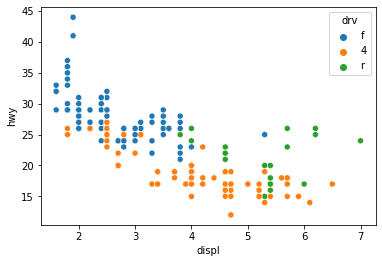

In [5]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [6]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

In [7]:
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [8]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))

In [9]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


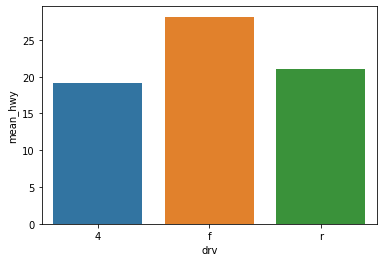

In [10]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

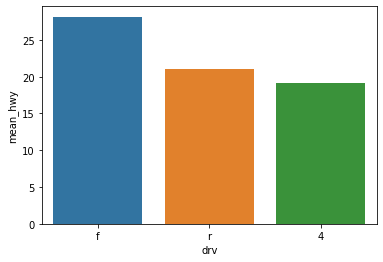

In [11]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [12]:
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))

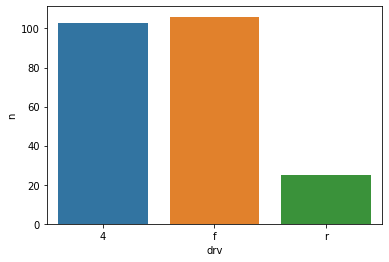

In [13]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

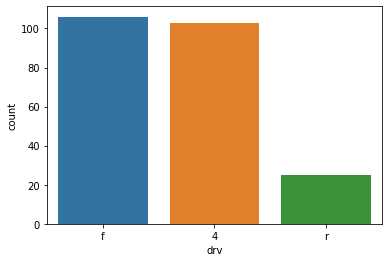

In [14]:
sns.countplot(data = mpg, x = 'drv')

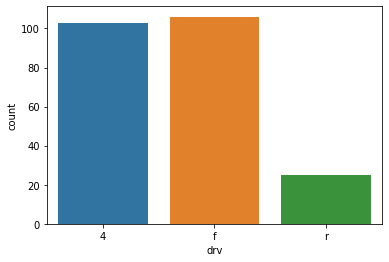

In [15]:
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [16]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object')

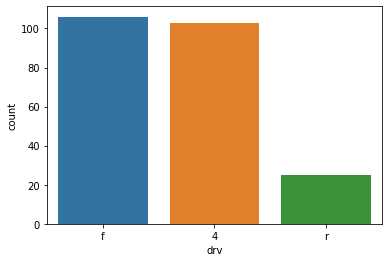

In [17]:
sns.countplot(data = mpg, x = 'drv', 
              order = mpg['drv'].value_counts().index)

In [23]:
mpg_df = mpg.query('category == "suv"').groupby('manufacturer').agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


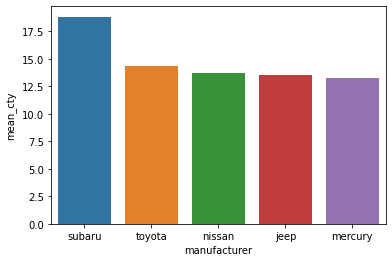

In [25]:
sns.barplot(mpg_df.index, mpg_df.mean_cty)

In [29]:
mpg_df2 = mpg.query('category == "suv"').groupby('manufacturer', as_index=False).agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending=False).head(5)

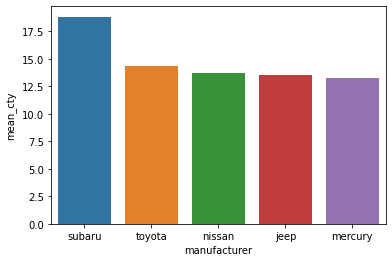

In [30]:
sns.barplot(data = mpg_df2, x = 'manufacturer', y = 'mean_cty')

In [37]:
mpg_df3 = mpg.groupby('category', as_index=False).agg(n = ('category', 'count')).sort_values('n', ascending=False)

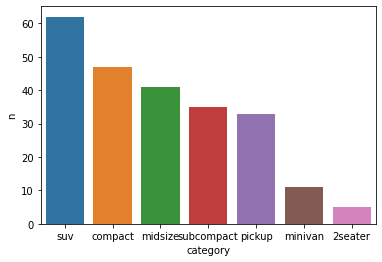

In [38]:
sns.barplot(data = mpg_df3, x = 'category', y = 'n')

In [39]:
economics = pd.read_csv('https://github.com/tidyverse/ggplot2/raw/main/data-raw/economics.csv')
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


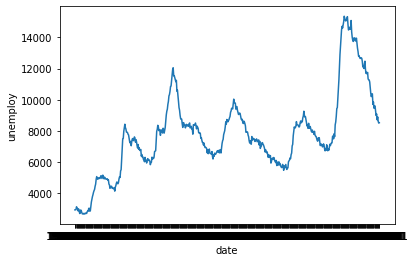

In [40]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [41]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [42]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [43]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [44]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [45]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [46]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


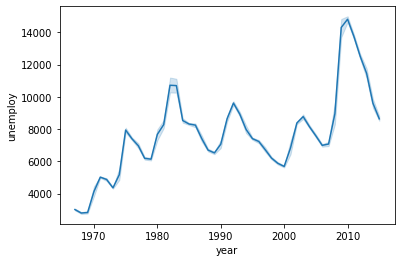

In [47]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

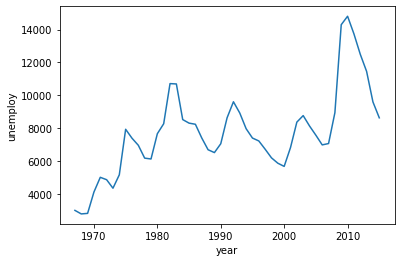

In [48]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci=None)

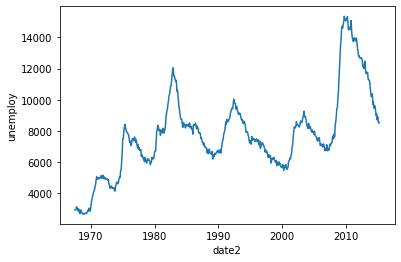

In [50]:
sns.lineplot(data = economics, x = 'date2', y = 'unemploy')

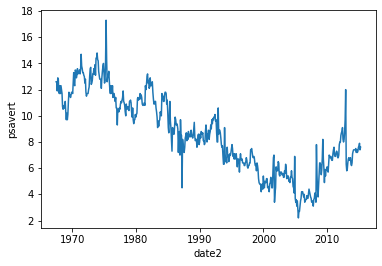

In [51]:
sns.lineplot(data = economics, x = 'date2', y = 'psavert')

In [52]:
economics['month'] = economics['date2'].dt.month

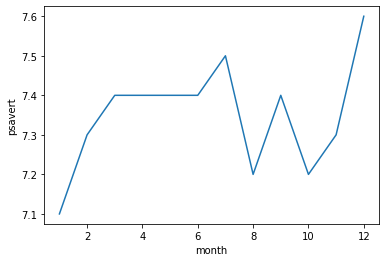

In [53]:
sns.lineplot(data = economics.query('year == 2014'), x = 'month', y = 'psavert')

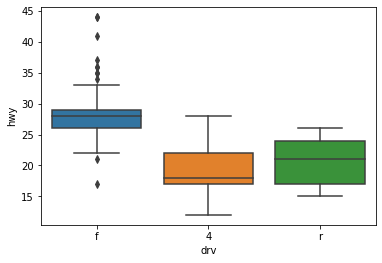

In [54]:
sns.boxplot(x = 'drv', y = 'hwy', data = mpg)

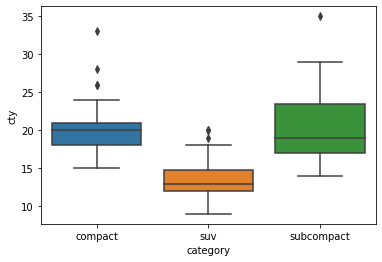

In [55]:
sns.boxplot(x = 'category', y = 'cty', data = mpg.query('category in ["compact", "subcompact", "suv"]'))